In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Handwritten Digits Classification

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

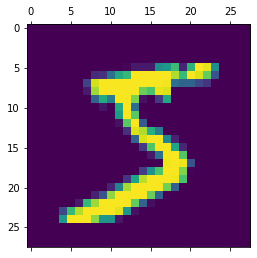

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [10]:
X_test_flatten.shape

(10000, 784)

In [11]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4889 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3064 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2856 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2746 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9260


In [12]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.9278


[0.26636651158332825, 0.9277999997138977]

In [13]:
y_predict = model.predict(X_test_flatten)
np.argmax(y_predict[6])

4

In [14]:
y_predict_label = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label)

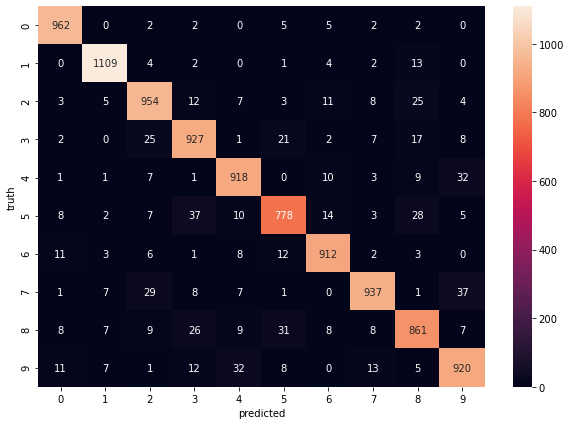

In [15]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [16]:
model1 = keras.Sequential([keras.layers.Dense(100,input_shape = (784,),activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')])
model1.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model1.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.91 - 6s 3ms/step - loss: 0.2931 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1396 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1000 - accuracy: 0.9696
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0792 - accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9804


In [17]:
model1.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9704


[0.0979829877614975, 0.9703999757766724]

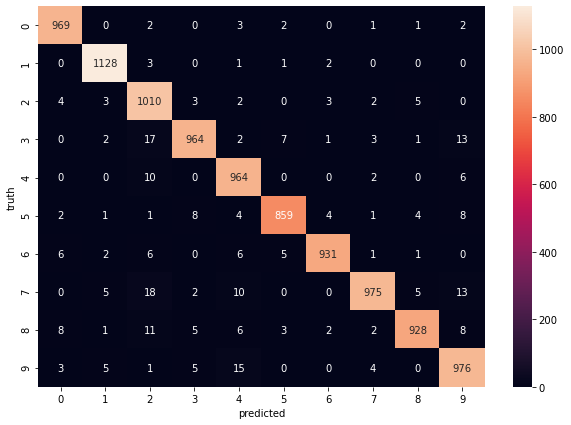

In [18]:
y_predict1 = model1.predict(X_test_flatten)
y_predict_label1 = [np.argmax(i) for i in y_predict1]
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_label1)
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [19]:
import datetime, os
model1 = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation='relu'), keras.layers.Dense(10,activation='sigmoid')])
#logs_base_dir = './logs'
#logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/', histogram_freq = 1)
model1.compile(optimizer = 'SGD',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model1.fit(X_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 2.2890 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\ADMIN\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8927 - accuracy: 0.7684
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3615 - accuracy: 0.8997
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.9142
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2750 - accuracy: 0.9228
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2519 - accuracy: 0.9291


# Tensorboard

In [20]:
%load_ext tensorboard
#%tensorboard --logdir= C:Users/ADMIN/logs/
%tensorboard --logdir C:User/ADMIN/logs/ --host localhost --port 6006
%reload_ext tensorboard

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 5920.

# Mini Batch Gradient Descent

In [21]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [22]:
df.shape

(20, 3)

In [23]:
X = df.drop(['price'], axis = 'columns')
y = df.price

In [24]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_x = sx.fit_transform(X)
scaled_y = sy.fit_transform(y.values.reshape(df.shape[0], 1))

In [25]:
import random
def mini_gd(X, y_true, epochs, batch_size = 5,learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        Y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples, batch_size):
            sample_x = X_tmp[j:j+batch_size]
            sample_y = Y_tmp[j:j+batch_size]
            y_pred = np.dot(w, sample_x.T) + b
        
        wgrad = -(2/len(sample_x))*(np.dot(sample_x.T, (sample_y - y_pred)))
        bgrad = -(2/len(sample_x))*np.sum(sample_y - y_pred)
        
        w = w - learning_rate*wgrad
        b = b - learning_rate*bgrad
        
        cost = np.mean(np.square(sample_y - y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_gd(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 100)
w, b, cost

(array([0.81481829, 0.78316624]), -0.30235023607825995, 0.0089738093687898)

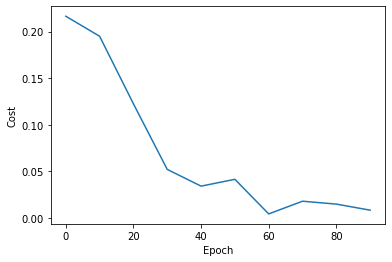

In [26]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

# Implement MSE without numpy

In [27]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [28]:
def mse(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += (yp - yt)**2
    print('Total Error:', total_error)
    mse = total_error/len(y_true)
    print('Mean Squared Error:', mse)

In [29]:
mse(y_predicted, y_true)

Total Error: 1.83
Mean Squared Error: 0.366


# Implement MSE with numpy

In [30]:
def mse_np(y_predicted, y_true):
    return np.mean(np.square(y_true - y_predicted))

In [31]:
mse_np(y_predicted, y_true)

0.366

# Image Classification

In [32]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.cifar10.load_data()

In [33]:
X_train.shape

(50000, 32, 32, 3)

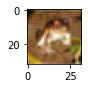

In [34]:
def plot_sample(index):
    plt.figure(figsize = (10, 1))
    plt.imshow(X_train[index])
plot_sample(0)

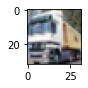

In [35]:
plot_sample(1)

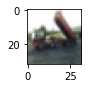

In [36]:
plot_sample(2)

In [37]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


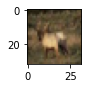

In [38]:
plot_sample(3)

In [39]:
y_train[3]

array([4], dtype=uint8)

In [40]:
classes[y_train[3][0]]

'deer'

In [41]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [42]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [43]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')

In [44]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [47]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (32,32,3)),
                          keras.layers.Dense(3000, activation =  'relu'),
                          keras.layers.Dense(1000, activation =  'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')   
])
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 127s 81ms/step - loss: 1.8631 - accuracy: 0.3346


# CNN